# Project 2 - Classification


## Section 1.0 The Problem: "Predicting whether a user is a Free or Premium subscriber (Subscription Type) using demographic and listening behavior features"

Predicting whether a user will remain free or purchase a subscription to become a premium member is critical for streaming platforms because it directly affects revenue, customer experience, and strategic decision-making. Premium subscriptions are the financial backbone of the industry, and understanding which users are most likely to upgrade allows companies to optimize marketing strategies, and tailor offers that genuinely enhance the listening experience. Beyond music, this classification problem also mirrors challenges faced by  most subscription based businesses, making it both valuable and widely applicable outiside of just this dataset.Overall solving this problem can help platforms balance profitability with user satisfaction in what already is a highly competitive market.

In [22]:
## Setup Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns




## Section 1.1 Introducing the Data 

The data set that I will be using is the [Global Music Streaming Listener Preferences Analysis] (https://github.com/SDVNishant9/Global-Music-Streaming-Listener-Preferences-Analysis). 

This dataset is a collection of 5,000 users on different music streaming platforms and their preferences for different types of music based on many factors like preferred genres, preferred artists, preferred streaming platforms, country of residence, age, etc. This dataset does contain limitations as this data set was collected from a sample of 5,000 users which is a very small representation compared to the entire population that listens to music. This data is also only collected from streaming services so if a user only listens to music via Radio, they will not be included in this data set which can skew overall results.


In [23]:
music_data = pd.read_csv('Music_Preferences.csv')

# A quick look at the columns of the dataset
print(music_data.columns)


Index(['User_ID', 'Age', 'Country', 'Streaming Platform', 'Top Genre', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Most Played Artist', 'Subscription Type', 'Listening Time (Morning/Afternoon/Night)', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)'], dtype='object')


In [24]:
# A quick look at the first 5 rows of the dataset
pd.set_option("display.width", 500)
print(music_data.head())

  User_ID  Age    Country Streaming Platform Top Genre  Minutes Streamed Per Day  Number of Songs Liked Most Played Artist Subscription Type Listening Time (Morning/Afternoon/Night)  Discover Weekly Engagement (%)  Repeat Song Rate (%)
0   U1000   34      Japan              Tidal    Reggae                       295                    138              Adele              Free                                Afternoon                           47.42                 16.74
1   U1001   24    Germany             Deezer   Country                        86                    388         Ed Sheeran           Premium                                    Night                           12.06                 69.25
2   U1002   49    Germany             Deezer       Pop                       363                    368        Post Malone           Premium                                Afternoon                           47.19                 67.38
3   U1003   55  Australia            YouTube    Reggae  

## Section 1.2 Preprocessing the Data

We want to preprocess the data to make sure that it is clean and ready to be used for the classification problem because if the data is not properly cleaned/preprocessed then the classification model will not be able to make accurate predictions and the results will not be reliable. 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Drop User_ID (not predictive)
music_data = music_data.drop(columns=['User_ID'])

# 2. Check for missing values
print("Missing values per column:\n", music_data.isnull().sum())

# (Optional) Drop rows with missing values for now
music_data = music_data.dropna()

# 3. Encode categorical columns
categorical_cols = ['Country', 'Streaming Platform', 'Top Genre', 
                    'Most Played Artist', 'Subscription Type', 
                    'Listening Time (Morning/Afternoon/Night)']

encoder = LabelEncoder()
for col in categorical_cols:
    music_data[col] = encoder.fit_transform(music_data[col])

# 4. Define features (X) and target (y)
X = music_data.drop(columns=['Subscription Type'])  # features
y = music_data['Subscription Type']  # target

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing complete! Training data shape:", X_train.shape)


Missing values per column:
 Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Number of Songs Liked                       0
Most Played Artist                          0
Subscription Type                           0
Listening Time (Morning/Afternoon/Night)    0
Discover Weekly Engagement (%)              0
Repeat Song Rate (%)                        0
dtype: int64
Preprocessing complete! Training data shape: (4000, 10)


Now that the data is preprocessed, we can move on to visualizating the data.

## Section 2.0 Visualizing the Data

Before building models, we must understand the data by visualizing it. Visualizations help us understand relationships between features and uncover trends that raw numbers either can’t show or make it very difficult to. For this project, since the main goal is to classify users as Free or Premium, so we need to look for patterns that could help predict subscription type.

To do this we wil use:

Pie Chart: to visualize the balance between Free and Premium users in the dataset.

Violin Plot: to compare the distribution of Minutes Streamed per Day across subscription types, showing both typical behavior and variability.

Correlation Heatmap: to examine relationships between numeric features, which can help identify predictors for subscription type.



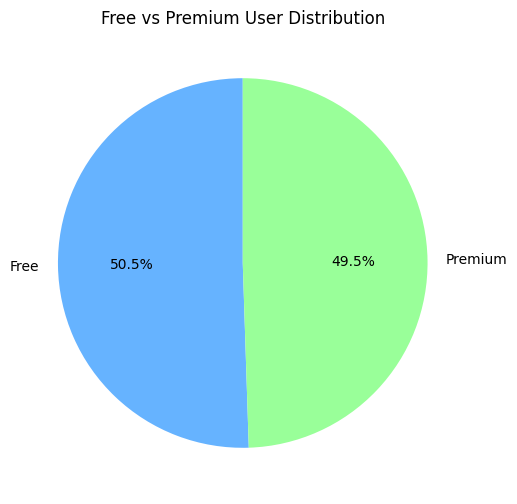

In [26]:
# Create a labeled version of Subscription Type for plots
music_data["Subscription Label"] = music_data["Subscription Type"].map({0: "Free", 1: "Premium"})

plt.figure(figsize=(6,6))
music_data["Subscription Label"].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=["#66b3ff","#99ff99"], labels=["Free","Premium"]
)
plt.title("Free vs Premium User Distribution")
plt.ylabel("")  # remove y-label for cleaner pie
plt.show()


The pie chart illustrates that the dataset is nearly balanced between Free and Premium users (roughly 50/50). This is important because it ensures that our classification model won’t be biased toward one group, and each subscription type is fairly represented.

C:\Users\ItsBr\AppData\Local\Temp\ipykernel_17372\554284314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


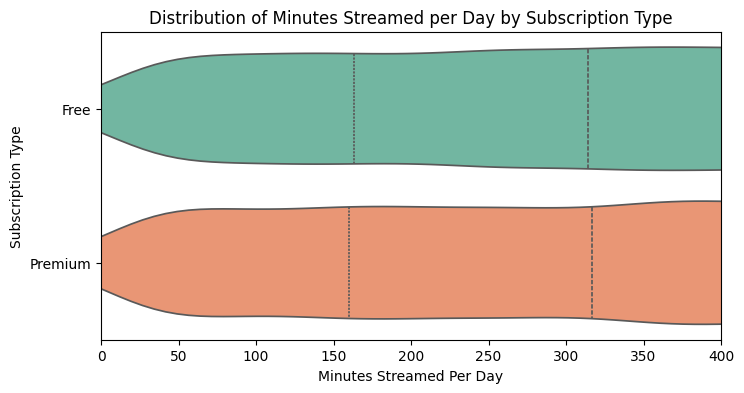

In [27]:
plt.figure(figsize=(8,4))
sns.violinplot(
    data=music_data,
    y="Subscription Label",   # horizontal layout
    x="Minutes Streamed Per Day",
    palette="Set2",
    inner="quartile"          # shows median + quartiles inside the violin
)
plt.title("Distribution of Minutes Streamed per Day by Subscription Type")
plt.xlabel("Minutes Streamed Per Day")
plt.ylabel("Subscription Type")
plt.xlim(0, 400)  # optional: adjust to your data range for readability
plt.show()

The violin plot displays the distribution of daily streaming minutes for Free and Premium users. The width of the violin shows where most users fall, while the inner lines indicate the median and quartiles. This reveals that Premium users generally stream more minutes per day than Free users, and it also shows the variability within each group. This insight is directly relevant for modeling, as streaming behavior is likely a strong predictor of subscription type.

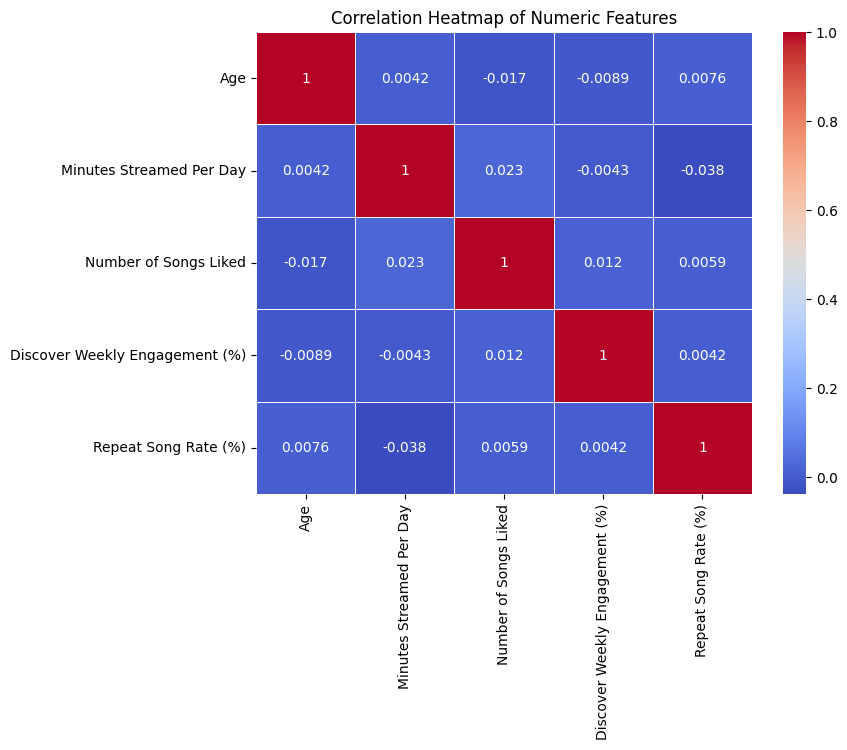

In [28]:
plt.figure(figsize=(8,6))
corr = music_data[["Age","Minutes Streamed Per Day","Number of Songs Liked","Discover Weekly Engagement (%)","Repeat Song Rate (%)"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


The heatmap shows the relationships between numeric features such as Age, Minutes Streamed per Day, Number of Songs Liked, Discover Weekly Engagement (%), and Repeat Song Rate (%). Strong correlations can highlight which features are most relevant for predicting subscription type. For example, if “Minutes Streamed” and “Discover Weekly Engagement” are positively correlated, it suggests that more engaged users tend to stream more, which may help differentiate Premium from Free users.

# Section 6: References

1. [Global Music Streaming Listener Preferences Analysis](https://github.com/SDVNishant9/Global-Music-Streaming-Listener-Preferences-Analysis)
    - This is the original location in which I found the data set that I used in this project.
2. [ChatGPT](https://chat.openai.com/)
    - I used ChatGPT to help me with my research decisions such as which visualizations to use to best represent the data set in the manner I want in order to answer my questions.
    - I used ChatGPT to help expand my knowledge of creating visualizations such as using it to find all of the color options for my visualizations so that I can easier to understand and make them more accessible to those with color-vision impairments such as myself. 